In [1]:
import numpy as np
from scipy.constants import c, m_e, elementary_charge
import h5py as hp
import matplotlib.pyplot as plt
from mbtrack2 import Synchrotron, Electron
from mbtrack2.utilities import Optics
from mbtrack2.impedance.wakefield import WakeField
from mbtrack2.tracking import LongitudinalMap, SynchrotronRadiation, TransverseMap
from mbtrack2.tracking import IntrabeamScattering
from mbtrack2.tracking import Beam, Bunch, WakePotential
from mbtrack2.tracking import RFCavity, SynchrotronRadiation
from mbtrack2.tracking.monitors import BunchMonitor, WakePotentialMonitor
from mbtrack2.tracking.feedback import FIRDamper, ExponentialDamper
import at
# from tqdm import tqdm
from tqdm.notebook import trange
import time
import argparse

mbtrack2 version 0.8.0
--------------------------------------------------
If used in a publication, please cite mbtrack2 paper and the zenodo archive for the corresponding code version (and other papers for more specific features).
[1] A. Gamelin, W. Foosang, N. Yamamoto, V. Gubaidulin and R. Nagaoka, “mbtrack2”. Zenodo, Dec. 16, 2024. doi: 10.5281/zenodo.14418989.
[2] A. Gamelin, W. Foosang, and R. Nagaoka, “mbtrack2, a Collective Effect Library in Python”, presented at the 12th Int. Particle Accelerator Conf. (IPAC'21), Campinas, Brazil, May 2021, paper MOPAB070.




In [ ]:
Synchrotron(

In [2]:

def v24(IDs="close", lat="V004", load_lattice=True):
    """
    TDR lattice using V2366_V004_Physical_Aperture.m

    Returns
    -------
    ring : Synchrotron object

    """    
    
    h = 1120
    particle = Electron()
    tau = np.array([9.045401802006868, 9.045401802006868, 4.522700901003434])
    sigma_0 = 0.004/c
    sigma_delta = 0.001
    # emit = np.array([6.572332790704266e-07, 1.3144665581408531e-09])    
    # emit = np.array([9.999999999999999e-06/39139.023671477466, 9.999999999999999e-06/39139.023671477466])
    emit = np.array([1.6792275775376196e-11, 1.6792275775376196e-11]) 
    # E0 = 45600000000.0
    # E0 = 20000000000.0 #at injection eV
    # tune = np.array([414.225, 410.29])
    # chro = np.array([2.057246532, 1.778971585])
    # ac = -7.119783162182757e-06
    # U0= 1337276.2433950102
    
    if load_lattice:
        if IDs=="close":
            lattice_file = "V24_1FODO_02.mat"
        else:
            lattice_file = "V24_1FODO_02.mat"
    
        # mean values
        # alpha = np.array([0, 0])
        optics = Optics(lattice_file=lattice_file, n_points=1e4)
        
        # ring = Synchrotron(h, optics, particle, tau=tau,emit=emit, 
                           # sigma_0=sigma_0, sigma_delta=sigma_delta, E0=E0, ac=ac, tune=tune, chro=chro, U0=U0)
        ring = Synchrotron(h, optics, particle, tau=tau,emit=emit, 
                   sigma_0=sigma_0, sigma_delta=sigma_delta)

    
    return ring

In [3]:
def v3588(IDs="close", lat="V004", load_lattice=True):
    """
    TDR lattice using V2366_V004_Physical_Aperture.m

    Returns
    -------
    ring : Synchrotron object

    """    
    
    h = 416
    particle = Electron()
    tau = np.array([7.68e-3, 14.14e-3, 12.18e-3])
    sigma_0 = 9e-12
    sigma_delta = 9.07649e-4
    emit = np.array([84.4e-12, 84.4e-13])
    # [84.4e-12, 84.4e-13]
    
    if load_lattice:
        if IDs=="close":
            lattice_file = "V3588_RING_for_Salah.mat"
        else:
            lattice_file = "V3588_RING_for_Salah.mat"
    
        # mean values
        alpha = np.array([0, 0])
        optics = Optics(lattice_file=lattice_file, local_alpha=alpha, n_points=1e4)
        
        ring = Synchrotron(h, optics, particle, tau=tau, emit=emit, 
                           sigma_0=sigma_0, sigma_delta=sigma_delta)
    else:
        L = 353.97
        E0 = 2.75e9
        particle = Electron()
        ac = 1.0695e-4
        U0 = 452.6e3
        tune = np.array([54.2, 18.3])
        chro = np.array([1.6, 1.6])
        
        beta = np.array([3.288, 4.003])
        alpha = np.array([0, 0])
        dispersion = np.array([0, 0, 0, 0])
        
        optics = Optics(local_beta=beta, local_alpha=alpha, 
                      local_dispersion=dispersion)
        ring = Synchrotron(h, optics, particle, L=L, E0=E0, ac=ac, U0=U0, tau=tau,
                       emit=emit, tune=tune, sigma_delta=sigma_delta, 
                       sigma_0=sigma_0, chro=chro)
    
    return ring

In [2]:
#test_run mbtrack2 with SOLEIL parameters
def v2366(IDs="close", lat="V004", load_lattice=True):
    """
    TDR lattice using V2366_V004_Physical_Aperture.m

    Returns
    -------
    ring : Synchrotron object

    """    
    
    h = 416
    particle = Electron()
    tau = np.array([7.68e-3, 14.14e-3, 12.18e-3])
    sigma_0 = 9e-12
    sigma_delta = 9.07649e-4
    emit = np.array([84.4e-12, 84.4e-13])
    
    if load_lattice:
        if IDs=="close":
            lattice_file = "V3588_RING_for_Salah.mat"
        else:
            lattice_file = "V3588_RING_for_Salah.mat"
    
        # mean values
        alpha = np.array([0, 0])
        optics = Optics(lattice_file=lattice_file, local_alpha=alpha, n_points=1e4)
        
        ring = Synchrotron(h, optics, particle, tau=tau, emit=emit, 
                           sigma_0=sigma_0, sigma_delta=sigma_delta)
    else:
        L = 353.97
        E0 = 2.75e9
        particle = Electron()
        ac = 1.0695e-4
        U0 = 452.6e3
        tune = np.array([54.2, 18.3])
        chro = np.array([1.6, 1.6])
        
        beta = np.array([3.288, 4.003])
        alpha = np.array([0, 0])
        dispersion = np.array([0, 0, 0, 0])
        
        optics = Optics(local_beta=beta, local_alpha=alpha, 
                      local_dispersion=dispersion)
        ring = Synchrotron(h, optics, particle, L=L, E0=E0, ac=ac, U0=U0, tau=tau,
                       emit=emit, tune=tune, sigma_delta=sigma_delta, 
                       sigma_0=sigma_0, chro=chro)
    
    return ring
    
def model_ring():
    h = 416 # Harmonic number of the accelerator.
    L = 353.97 # Ring circumference in [m].
    E0 = 2.75e9 # Nominal (total) energy of the ring in [eV].
    particle = Electron() # Particle considered.
    ac = 1.0695e-4
    U0 = 452.6e3# Energy loss per turn in [eV].
    tau = np.array([7.68e-3, 14.14e-3, 12.18e-3]) #horizontal, vertical and longitudinal damping times in [s].
    tune = np.array([54.2, 18.3])
    emit = np.array([84.4e-12, 84.4e-13])
    sigma_0 = 9e-12
    sigma_delta = 9.07649e-4
    chro = np.array([1.6, 1.6])
    beta = np.array([3.288, 4.003])
    alpha = np.array([0, 0])
    dispersion = np.array([0, 0, 0, 0])
    optics = Optics(local_beta=beta, local_alpha=alpha, 
                      local_dispersion=dispersion)
    ring3 = Synchrotron(h=h, optics=optics, particle=particle, L=L, E0=E0, ac=ac,
                       U0=U0, tau=tau, emit=emit, tune=tune,
                       sigma_delta=sigma_delta, sigma_0=sigma_0, chro=chro)
    return ring3
#Particles number
def run_mbtrack2(
    n_turns=900,
    n_macroparticles=9000,
    bunch_current=1.2e-2, modelname="PS"
):
    # ring
    ring3 = model_ring()
    ring = v2366(IDs="open")
    ring2 = ring
    # ring2.emit[1] = .3*ring2.emit[0]
    # ring2.tau[0] = ring2.tau[0]/1
    # ring2.tau[1] = ring2.tau[1]/1
    # ring2.tau[2] = ring2.tau[2]/1

    particle = Electron()
    # bunch
    mybunch = Bunch(
        ring2, mp_number=n_macroparticles, current=bunch_current, track_alive=True
    )
    np.random.seed(42)
    mybunch.init_gaussian()
    # offset 
    # mybunch['x'] = +1e-3
    # mybunch['y'] = +1e-3
    #Tracking elements
    long_map = LongitudinalMap(ring)
    sr = SynchrotronRadiation(ring, switch=[1, 1, 1])
    trans_map = TransverseMap(ring)
    V_rf  = 1.8e6 #1.8e6
    rf = RFCavity(ring2, m=1, Vc=V_rf, theta=np.arccos(ring.U0 / V_rf))
    # thetas = ((ring.U0/(V_rf * (2 * np.pi * ring.f0)**2)) - np.sqrt(2) / 2) * 1 / 0.5 * 4
    rf2 = RFCavity(ring2, m=2, Vc= 0.5*V_rf, theta=np.arccos(np.sqrt(2) / 2))
    ibs = IntrabeamScattering(ring,model=modelname)    

    

    tracking_elements = [trans_map, long_map, rf, sr, ibs]
    # ---------------------------------------
    temps = time.strftime("%y%m%d_%H%M%S", time.localtime())
    monitor = BunchMonitor(1, 1,buffer_size=10, total_size=n_turns, file_name=modelname+"_"+temps)
    ###--------------------------------------------------------------------------------------------------------------
    # emittance
    emit = []

    for i in trange(n_turns):
        for el in tracking_elements:
            el.track(mybunch)
        monitor.track(mybunch)
        # stdx = np.std(mybunch["x"])
        # emitxx = stdx**2/ring2.optics.local_beta[0]
        # emitx.append(emitxx)
        emit.append(mybunch.emit)
    return mybunch, emit


bunch, emitx = run_mbtrack2(n_turns=100,
    n_macroparticles=1e4,
    bunch_current=6e-3, modelname="CIMP")

  0%|          | 0/100 [00:00<?, ?it/s]

In [3]:
#Fcc cell
def run_mbtrack2(
    n_turns=900,
    n_macroparticles=9000,
    bunch_current=1.2e-2, modelname="PS"
):
    # ring
    ring1 = v24(IDs="open", load_lattice=True)
    # ring2 = v3588(IDs="open", load_lattice=True)
    ring1.f1 = 800000000.0 #RF freq Hz
    ring1.f0 = 3306.823373098939
    ring1.chro = np.array([2.057246532, 1.778971585])
    ring1.ac = 7.119783162182757e-06
    ring1.U0= 1337276.2433950102
    ring1.tune = np.array([414.225, 410.29])
    # ring1.gamma = 39139.023671477466 #gamma is correct in at
    ring1.emit[1] = 0.002*ring1.emit[0]
    ring1.tau[0] = ring1.tau[0]/1
    ring1.tau[1] = ring1.tau[1]/1
    ring1.tau[2] = ring1.tau[2]/1
    ring1.L = 90658.71376109403
    # ring1.L = 90658.74531999999
    # ring1.E0 = 45600000000.0
    ring = ring1

    particle = Electron()
    # bunch
    mybunch = Bunch(
        ring, mp_number=n_macroparticles, current=bunch_current, track_alive=True
    )
    np.random.seed(42)
    mybunch.init_gaussian()
    # offset 
    # mybunch['x'] = +1e-3
    # mybunch['y'] = +1e-3
    #Tracking elements
    long_map = LongitudinalMap(ring)
    sr = SynchrotronRadiation(ring, switch=[1, 1, 1])
    trans_map = TransverseMap(ring)
    V_rf  = 50084569.672473334
    # V_rf = 1.8e6
    # theta = np.arccos(ring.U0 / V_rf)
    theta = -2.458296251434013
    
    rf = RFCavity(ring, m=1, Vc=V_rf, theta=theta)
    # thetas = ((ring.U0/(V_rf * (2 * np.pi * ring.f0)**2)) - np.sqrt(2) / 2) * 1 / 0.5 * 4
    rf2 = RFCavity(ring, m=2, Vc= 0.5*V_rf, theta=np.arccos(np.sqrt(2) / 2))
    ibs = IntrabeamScattering(ring,model=modelname)    

    tracking_elements = [trans_map, long_map, rf, sr, ibs]


    ##ibs track-------------------------------------------------------------------------------------
    temps = time.strftime("%y%m%d_%H%M%S", time.localtime())
    monitor = BunchMonitor(1, 1,buffer_size=10, total_size=n_turns, file_name=modelname+"_"+temps)
    ###--------------------------------------------------------------------------------------------------------------
    # emittance
    # emit = []

    for i in trange(n_turns):
        for el in tracking_elements:
            el.track(mybunch)
        monitor.track(mybunch)
        # stdx = np.std(mybunch["x"])
        # emitxx = stdx**2/ring.optics.local_beta[0]
        # emitx.append(emitxx)
        # emit.append(mybunch.emit)
    return mybunch, ring

bunch, ring = run_mbtrack2(n_turns=4000,
    n_macroparticles=1e4,
    bunch_current=1.3e-3, modelname="CIMP")

  0%|          | 0/4000 [00:00<?, ?it/s]

Keys: <KeysViewHDF5 ['BunchData_1']>
<HDF5 group "/BunchData_1" (6 members)>


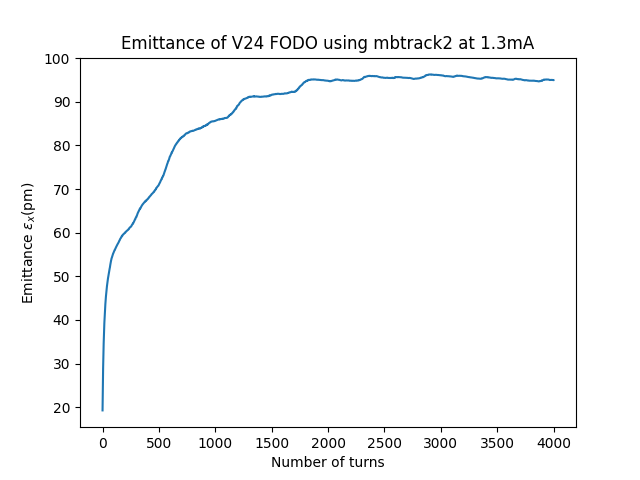

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

%matplotlib ipympl
temps = time.strftime("%y%m%d_%H%M%S", time.localtime())
with h5py.File('CIMP_250417_165756.hdf5', 'r') as f:
    print("Keys: %s" % f.keys())
    # print(f.keys())
    group = f["BunchData_1"]
    print(group)
    emit = group["emit"][:]
    current = f["BunchData_1"]["current"][0]
    emit = np.array(emit)

# print(emit[0,:])


plt.cla()
plt.plot(emit[0,:]*1e12)
plt.ylabel(r"Emittance $\epsilon_{x}$(pm)")
plt.title(f"Emittance of V24 FODO using mbtrack2 at {current*1e3}mA")
plt.xlabel("Number of turns")
# plt.figure(figsize=(8,6))
# plt.savefig(f"figures/fig_{temps}_cpl.png")
plt.show()

In [5]:
ring.L


np.float64(90658.71376109106)

In [28]:
# with h5py.File('CIMP_250415_155139.hdf5', 'r') as f:
#     print("Keys: %s" % f.keys())
#     print(f["BunchData_1"].keys())
#     print(f["BunchData_1"]["current"][0])

plt.cla()
plt.plot(emit[0,:]*1e12)
plt.ylabel(r"Emittance $\epsilon_{x}$(pm)")
plt.title(f"Emittance of V24 FODO using mbtrack2 at {current}mA")
plt.xlabel("Number of turns")
# plt.figure(figsize=(8,6))
plt.savefig(f"figures/fig_{temps}_cpl.png")
plt.show()

Keys: <KeysViewHDF5 ['BunchData_1']>
<KeysViewHDF5 ['cs_invariant', 'current', 'emit', 'mean', 'std', 'time']>
0.0013


In [5]:
ringer = v2366(IDs="open")
# emit.shape

In [9]:
%matplotlib ipympl
x = np.linspace(0, ring.L, 1000)

betax = ring.optics.betaX(x)

plt.plot(x, betax)

In [6]:
ringer.f1

np.float64(352337309.5151137)

In [7]:
bunch.charge

np.float64(7.084120621330149e-09)

In [5]:
25000000000000.0*elementary_charge/(ringer.T0)

np.float64(0.013245292463634378)

In [8]:
# pour Soleil
Soleil_T0 = (353.97/3e8)
(1.2e-3 * Soleil_T0) / 1.6e-19

8849250000.000002

In [6]:
bunch.charge /ringer.T0

np.float64(0.006)

In [6]:
ring_f = v24()

In [11]:
import os
file = os.getcwd()
type(file)

str